In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [27]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)

              
        for i in range(epochs):
            
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
            
            
            
        return self.W, self.b

    def predict(self, X):
#         print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product
    
    

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/anandjha90/iNeuron_FSDA/main/P9-Pets.csv")
df.head()

,PetID,Name,Kind,Gender,Age,OwnerID
0,J6-8562,Blackie,Dog,male,11,5168
1,Q0-2001,Roomba,Cat,male,9,5508
2,M0-2904,Simba,Cat,male,1,3086
3,R3-7551,Keller,Parrot,female,2,7908
4,P2-7342,Cuddles,Dog,male,13,4378


In [35]:
# feature engineering?
x = (df['Weight']-df['Weight'].mean())/df['Weight'].std() #standardization of the dataset
y = (df["Height"]-df['Height'].mean())/df["Height"].std()
x.shape, y.shape

KeyError: 'Weight'

In [36]:
reg = LinearRegression(n_features=1)

[336.44541542] -82.94966881767782


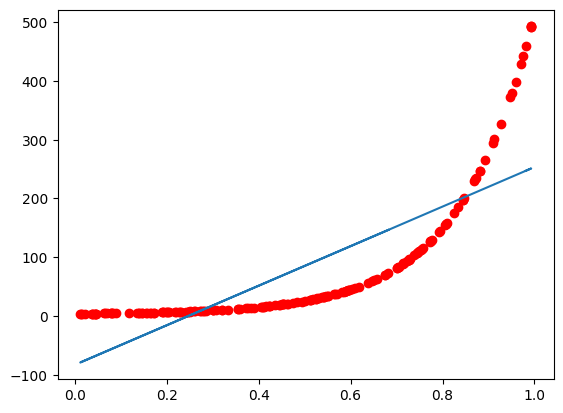

In [37]:
params = reg.train(x, y, epochs=200, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

In [38]:
def foo(w, b, n):
    x = np.random.rand(n,1)
    y = np.power(2, (w*x)) + b
    return x, y

x, y = foo(9, 3, 25000)
x.shape, y.shape

((25000, 1), (25000, 1))

In [39]:
reg = LinearRegression(n_features=1)

[334.85261825] -82.84488639316952


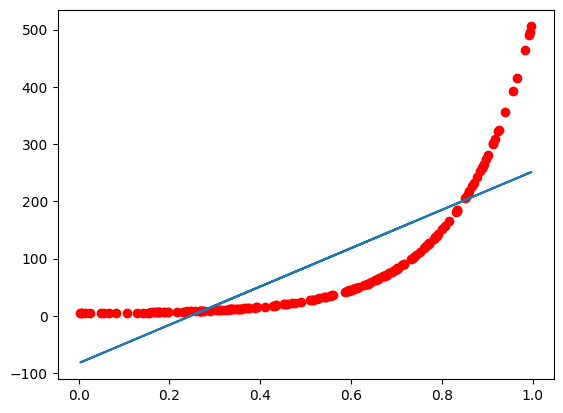

In [40]:
params = reg.train(x, y, epochs=500, learning_rate=0.225)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])